# Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data

## <u>Training data</u>

In [2]:
# define filepath to read data
dir_path = './CMAPSS Data/'

# column names
index_cols = ['unit_num', 'time_cycles']
setting_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3']
sensor_cols = ['sens_{}'.format(i) for i in range(1,22)]
cols = index_cols + setting_cols + sensor_cols

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=cols)

# inspect first few rows
train.head()

unit_num  time_cycles  op_setting_1  op_setting_2  op_setting_3  sens_1  \
0         1            1       -0.0007       -0.0004         100.0  518.67   
1         1            2        0.0019       -0.0003         100.0  518.67   
2         1            3       -0.0043        0.0003         100.0  518.67   
3         1            4        0.0007        0.0000         100.0  518.67   
4         1            5       -0.0019       -0.0002         100.0  518.67   

   sens_2   sens_3   sens_4  sens_5  ...  sens_12  sens_13  sens_14  sens_15  \
0  641.82  1589.70  1400.60   14.62  ...   521.66  2388.02  8138.62   8.4195   
1  642.15  1591.82  1403.14   14.62  ...   522.28  2388.07  8131.49   8.4318   
2  642.35  1587.99  1404.20   14.62  ...   522.42  2388.03  8133.23   8.4178   
3  642.35  1582.79  1401.87   14.62  ...   522.86  2388.08  8133.83   8.3682   
4  642.37  1582.85  1406.22   14.62  ...   522.19  2388.04  8133.80   8.4294   

   sens_16  sens_17  sens_18  sens_19  sens_20  sens_21  
0     0.03      392     2388    100.0    39.06  23.4190  
1     0.03      392     2388    100.0    39.00  23.4236  
2     0.03      390     2388    100.0    38.95  23.3442  
3     0.03      392     2388    100.0    38.88  23.3739  
4     0.03      393     2388    100.0    38.90  23.4044  

[5 rows x 26 columns]


## <u>Test data</u>

In [3]:
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=cols)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])


## <u>Investigate training data</u>

In [4]:
train[index_cols].describe()

unit_num   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

### Assessment of units & cycles
We can identify 100 engine units with varying numbers of cycles for each unit before breaking down indicated by the variation in the time_cycles descriptions.

In [5]:
train[index_cols].groupby('unit_num').max().describe()

time_cycles
count   100.000000
mean    206.310000
std      46.342749
min     128.000000
25%     177.000000
50%     199.000000
75%     229.250000
max     362.000000

### Assessment of unit_num
100 engine units can be identified with a mean of 206 cycles before breakdown.

In [6]:
train[setting_cols].describe()

op_setting_1  op_setting_2  op_setting_3
count  20631.000000  20631.000000       20631.0
mean      -0.000009      0.000002         100.0
std        0.002187      0.000293           0.0
min       -0.008700     -0.000600         100.0
25%       -0.001500     -0.000200         100.0
50%        0.000000      0.000000         100.0
75%        0.001500      0.000300         100.0
max        0.008700      0.000600         100.0

### Assessment of operational settings
Operational settings 1 & 2 show small variations in the setting, but not enough to be identified as additional settings.

In [7]:
train[sensor_cols].describe().transpose()

count         mean           std        min        25%        50%  \
sens_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
sens_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
sens_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
sens_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
sens_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
sens_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
sens_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
sens_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
sens_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
sens_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
sens_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
sens_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
sens_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
sens_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
sens_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
sens_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
sens_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
sens_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
sens_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
sens_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
sens_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

               75%        max  
sens_1    518.6700   518.6700  
sens_2    643.0000   644.5300  
sens_3   1594.3800  1616.9100  
sens_4   1414.5550  1441.4900  
sens_5     14.6200    14.6200  
sens_6     21.6100    21.6100  
sens_7    554.0100   556.0600  
sens_8   2388.1400  2388.5600  
sens_9   9069.4200  9244.5900  
sens_10     1.3000     1.3000  
sens_11    47.7000    48.5300  
sens_12   521.9500   523.3800  
sens_13  2388.1400  2388.5600  
sens_14  8148.3100  8293.7200  
sens_15     8.4656     8.5848  
sens_16     0.0300     0.0300  
sens_17   394.0000   400.0000  
sens_18  2388.0000  2388.0000  
sens_19   100.0000   100.0000  
sens_20    38.9500    39.4300  
sens_21    23.3668    23.6184

### Assessment of sensors
sens_1, sens_10, sens_18 & sens_19 have no variation so can be removed from the dataset

sens_5, sen6 & sens_16 show very little variation so may be able to be removed from the dataset

sens_9 & sens_14 show the most variance, these are likely to be important parameters in determining RUL.

## <u>Calculate RUL (Remaining Useful Life) parameter for training data</u>

In [8]:
def CalculateRemainingUsefulLife(df):
    # Get the total number of cycles for each unit
    group_by_unit = df.groupby(by='unit_num')
    max_cycle = group_by_unit['time_cycles'].max()
#    print(max_cycle)
    
    new_df = train.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_num', right_index=True)
    new_df['RUL'] = new_df['max_cycle'] - new_df['time_cycles']
#    print(new_df)
    
    new_df = new_df.drop('max_cycle',axis=1)
    
    return new_df

In [9]:
train = CalculateRemainingUsefulLife(train)

train[index_cols+setting_cols+['RUL']].head()

unit_num  time_cycles  op_setting_1  op_setting_2  op_setting_3  RUL
0         1            1       -0.0007       -0.0004         100.0  191
1         1            2        0.0019       -0.0003         100.0  190
2         1            3       -0.0043        0.0003         100.0  189
3         1            4        0.0007        0.0000         100.0  188
4         1            5       -0.0019       -0.0002         100.0  187

### Plot the disribution of number of cycles to breakdown

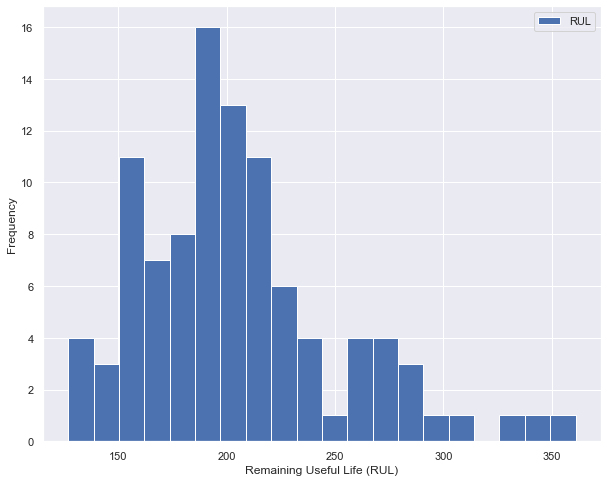

In [10]:
train[['unit_num', 'RUL']].groupby('unit_num').max().plot.hist(bins=20,figsize=(10,8))
plt.xlabel('Remaining Useful Life (RUL)')
plt.show()

### Plot sensor data

In [11]:
def PlotSensorData(df):
    fig = plt.figure(figsize=(15, 18))
    for n, sensor_col in enumerate(sensor_cols):
        ax = fig.add_subplot(7,3,n+1)
        for i in df['unit_num'].unique():
            if (i % 10 == 0): # only plot every 10th engine unit number
                plt.plot('RUL', sensor_col, data=df[df['unit_num']==i])
        plt.xlim(250, 0) # reverse the x-axis so RUL counts down to zero
        plt.xticks(np.arange(0, 275, 25))
        plt.ylabel(sensor_col)
        plt.xlabel('Remaining Useful Life (RUL)')
    plt.show()


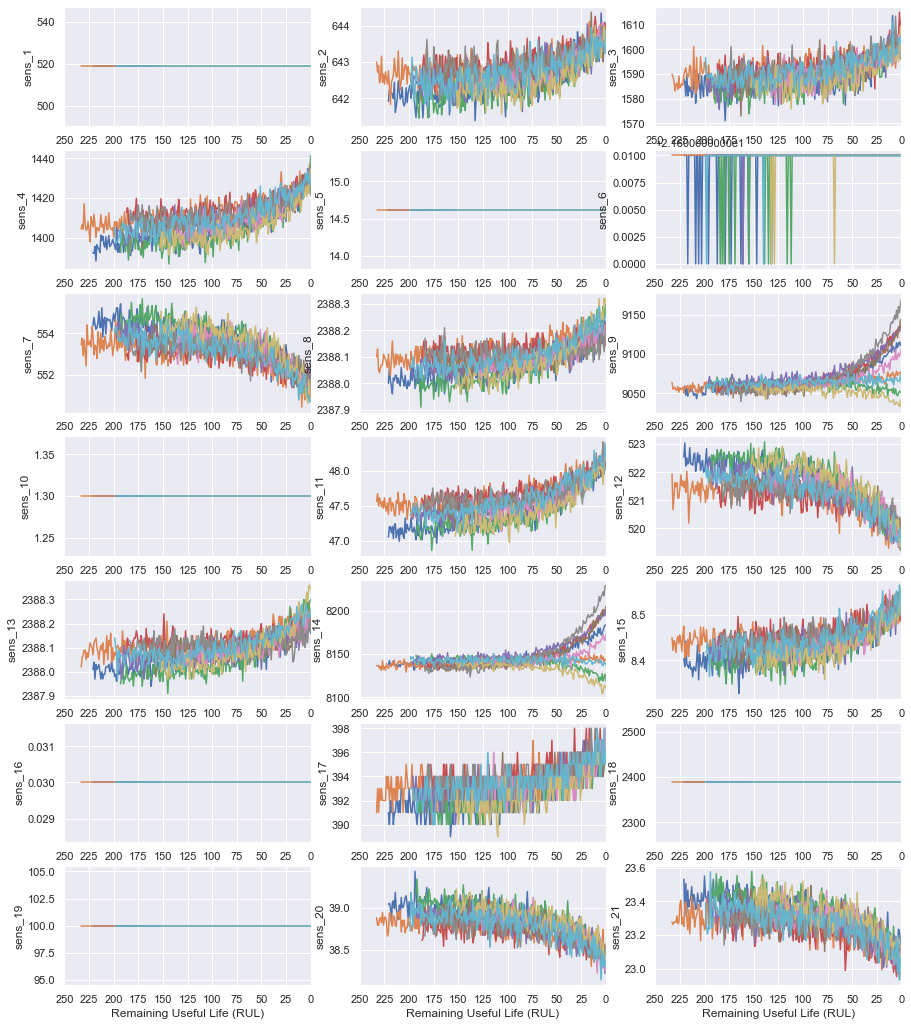

In [12]:
PlotSensorData(train)

### Further assessment of sensors

Sensors 1, 5, 10, 16, 18 & 19 all show flat line trends to RUL, these can be excluded.

Sensor 6 shows spikes that appear unrelated to RUL, this can also be excluded.

Sensors 2, 3, 4, 8, 11, 13, 15 and 17 show a trend to increase as RUL decreases.

Sensors 7, 12, 20 and 21 show a trend to decrease as RUL decreases.

Sensors 9 & 14 show a trend to decrease/increase as RUL descreases depending on the engine unit.


## <u>Investigate test data</u>

In [13]:
test.describe()

unit_num   time_cycles  op_setting_1  op_setting_2  op_setting_3  \
count  13096.000000  13096.000000  13096.000000  13096.000000       13096.0   
mean      51.543907     76.836515     -0.000011      0.000004         100.0   
std       28.289423     53.057749      0.002203      0.000294           0.0   
min        1.000000      1.000000     -0.008200     -0.000600         100.0   
25%       28.000000     33.000000     -0.001500     -0.000200         100.0   
50%       52.000000     69.000000      0.000000      0.000000         100.0   
75%       76.000000    113.000000      0.001500      0.000300         100.0   
max      100.000000    303.000000      0.007800      0.000700         100.0   

             sens_1        sens_2        sens_3        sens_4        sens_5  \
count  1.309600e+04  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean   5.186700e+02    642.475088   1588.099204   1404.735362  1.462000e+01   
std    6.014263e-11      0.400899      5.003274      6.688309  2.671743e-12   
min    5.186700e+02    641.130000   1569.040000   1384.390000  1.462000e+01   
25%    5.186700e+02    642.197500   1584.600000   1399.950000  1.462000e+01   
50%    5.186700e+02    642.460000   1587.990000   1404.440000  1.462000e+01   
75%    5.186700e+02    642.740000   1591.362500   1409.050000  1.462000e+01   
max    5.186700e+02    644.300000   1607.550000   1433.360000  1.462000e+01   

       ...       sens_12       sens_13       sens_14       sens_15  \
count  ...  13096.000000  13096.000000  13096.000000  13096.000000   
mean   ...    521.747724   2388.071025   8138.947817      8.425844   
std    ...      0.559627      0.056934     10.188605      0.029009   
min    ...    519.380000   2387.890000   8108.500000      8.332800   
25%    ...    521.380000   2388.030000   8132.310000      8.405600   
50%    ...    521.780000   2388.070000   8138.390000      8.424900   
75%    ...    522.150000   2388.110000   8144.360000      8.444300   
max    ...    523.760000   2388.320000   8220.480000      8.541400   

            sens_16       sens_17  sens_18  sens_19       sens_20  \
count  1.309600e+04  13096.000000  13096.0  13096.0  13096.000000   
mean   3.000000e-02    392.571625   2388.0    100.0     38.892502   
std    8.823140e-15      1.233577      0.0      0.0      0.141681   
min    3.000000e-02    389.000000   2388.0    100.0     38.310000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.800000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.900000   
75%    3.000000e-02    393.000000   2388.0    100.0     38.990000   
max    3.000000e-02    397.000000   2388.0    100.0     39.410000   

            sens_21  
count  13096.000000  
mean      23.335743  
std        0.084120  
min       22.935400  
25%       23.281600  
50%       23.339200  
75%       23.393600  
max       23.641900  

[8 rows x 26 columns]

In [14]:
y_test.describe()

RUL
count  100.00000
mean    75.52000
std     41.76497
min      7.00000
25%     32.75000
50%     86.00000
75%    112.25000
max    145.00000

## Baseline linear regression

In [15]:
def evaluate(y_true, y_hat,data,model,label='Test'):
    rmse, var = evaluate_simple(y_true, y_hat)
    
    new_data = [model, label, rmse, var]
    data.append(new_data)
    print(f'{label} set RMSE: {new_data[2]}, R2:{new_data[3]}')
    return data

In [16]:
def evaluate_simple(y_true, y_hat):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    var = r2_score(y_true, y_hat)
    
    return [rmse,var]

In [17]:
def PlotTestFit(models,results_dict):
    x_plt = results_dict['test']
    plt.figure(figsize=(10, 8))
    
    for model in models:
        y_plt = results_dict[model]
        max_val = np.max([x_plt,y_plt])
        
        plt.plot(x_plt,y_plt,'.',label=model)
    plt.plot([0, max_val],[0,max_val],label='Perfect fit')
    plt.xlabel('Actual RUL')
    plt.ylabel('Predicted RUL')
    plt.legend()
    plt.title(f'Actual RUL vs Predicted RUL\n{models}')


In [18]:
drop_sensors = ['sens_1','sens_5','sens_6','sens_10','sens_16','sens_18','sens_19']
drop_labels = index_cols+setting_cols+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each engine
# the test set is subsetted to represent the same
X_test = test.groupby('unit_num').last().reset_index().drop(drop_labels, axis=1)

Linear regression model
train set RMSE: 44.66819159545453, R2:0.5794486527796716
Test set RMSE: 31.952633027741815, R2:0.40877368076574083


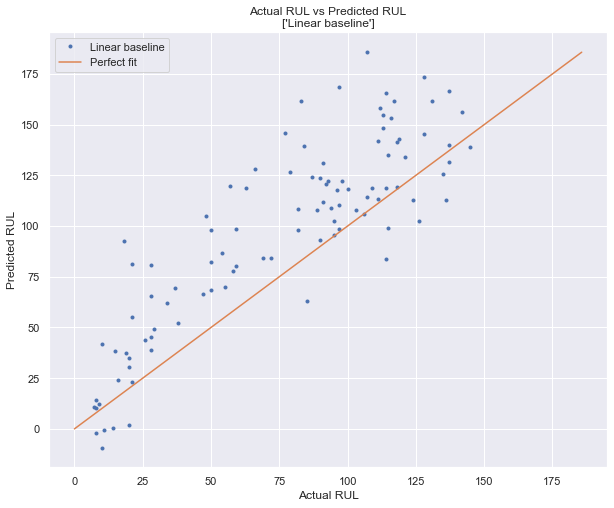

In [19]:
results_data = []
model_test_results = {'test': np.array(y_test['RUL'])}

# create and fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


print('Linear regression model')
# predict and evaluate
y_hat_train = lin_reg.predict(X_train)
results_data = evaluate(y_train, y_hat_train,results_data,'Linear baseline','train')

y_hat_test = lin_reg.predict(X_test)
results_data = evaluate(y_test, y_hat_test,results_data,'Linear baseline')

model_test_results['Linear baseline'] = y_hat_test
PlotTestFit(['Linear baseline'],model_test_results)

## Default k-nearest neighbour regression

Default KNN regression model
train set RMSE: 38.98994833237376, R2:0.6795741040417037
Test set RMSE: 36.30755844173497, R2:0.2366309534894816


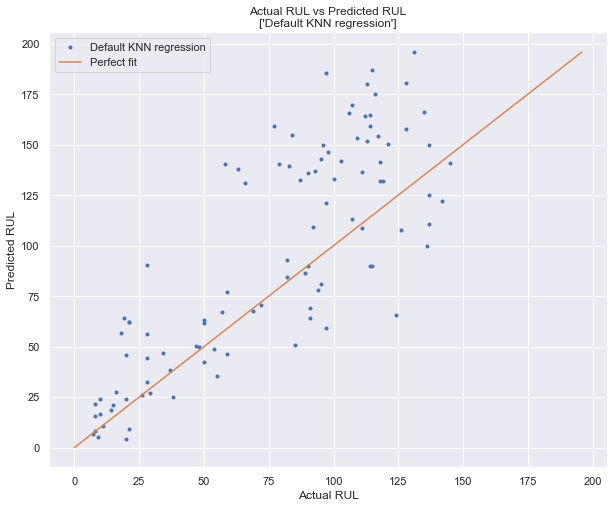

In [20]:
# create and fit k-nearest neighbour regression model
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

print('Default KNN regression model')
# predict and evaluate
y_hat_train = knn_reg.predict(X_train)
results_data = evaluate(y_train, y_hat_train,results_data,'KNN default','train')

y_hat_test = knn_reg.predict(X_test)
results_data = evaluate(y_test, y_hat_test,results_data,'KNN default')

model_test_results['Default KNN regression'] = y_hat_test
PlotTestFit(['Default KNN regression'],model_test_results)

## Optimise k-nearest neighbour regression
Optimise the k-nearest neighbour regression for the best k nearest neighbours

In [21]:
def k_stats(k, X_train, y_train, X_test, y_test):
    knn_reg = KNeighborsRegressor(n_neighbors=k) #train a KNN with K = k
    knn_reg.fit(X_train, y_train)
    
    # predict and evaluate
    y_hat_train = knn_reg.predict(X_train)
    knn_train_metrics = evaluate_simple(y_train, y_hat_train)
        
    y_hat_test = knn_reg.predict(X_test)
    knn_test_metrics = evaluate_simple(y_test, y_hat_test)
    
    return knn_train_metrics[0], knn_train_metrics[1], knn_test_metrics[0],knn_test_metrics[1]

In [22]:
K = [1,3,5,7,9,11,13,15,17,19]

K_train_rmse = []
K_train_r2 = []

K_test_rmse = []
K_test_r2 = []

for k in K:
    knn_train_rmse, knn_train_r2, knn_test_rmse, knn_test_r2 = k_stats(k, X_train, y_train, X_test, y_test)
    
    K_train_rmse.append(knn_train_rmse)
    K_train_r2.append(knn_train_r2)
    
    K_test_rmse.append(knn_test_rmse)
    K_test_r2.append(knn_test_r2)

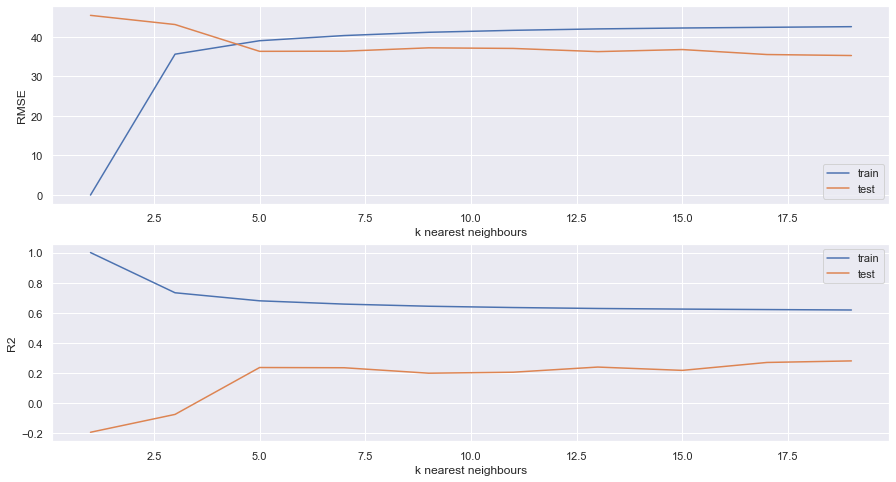

In [23]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(2,1,1)
ax.plot(K,K_train_rmse,label='train')
ax.plot(K,K_test_rmse,label='test')
ax.set_xlabel('k nearest neighbours')
ax.set_ylabel('RMSE')
ax.legend()

ax = fig.add_subplot(2,1,2)
ax.plot(K,K_train_r2,label='train')
ax.plot(K,K_test_r2,label='test')
ax.set_xlabel('k nearest neighbours')
ax.set_ylabel('R2')
ax.legend()

plt.show()

In [24]:
k_best = 5

In this case the best k appears to be k=5, which is also the default value.

## Optimised k-nearest neighbour

Optimised KNN regression model
train set RMSE: 38.98994833237376, R2:0.6795741040417037
Test set RMSE: 36.30755844173497, R2:0.2366309534894816


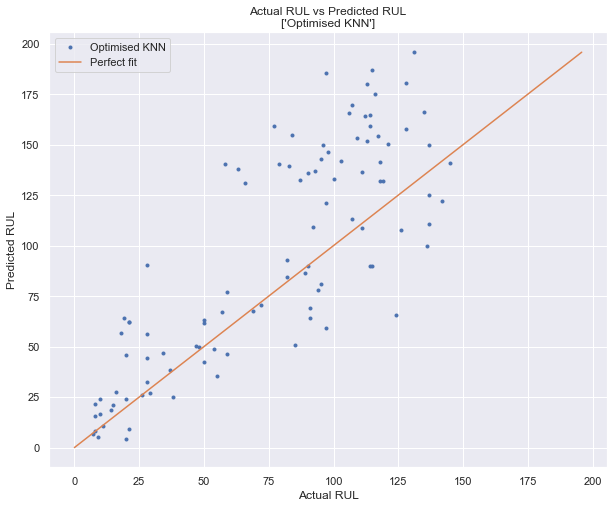

In [25]:
knn_opt = KNeighborsRegressor(n_neighbors=k_best) #train a KNN with K = k_best
knn_opt.fit(X_train, y_train)

print('Optimised KNN regression model')
# predict and evaluate
y_hat_train = knn_opt.predict(X_train)
results_data = evaluate(y_train, y_hat_train,results_data,'KNN opt','train')

y_hat_test = knn_opt.predict(X_test)
results_data = evaluate(y_test, y_hat_test,results_data,'KNN opt')

model_test_results['Optimised KNN'] = y_hat_test
PlotTestFit(['Optimised KNN'],model_test_results)

## Default decision tree regression

Default decision tree regression model
train set RMSE: 0.0, R2:1.0
Test set RMSE: 49.21676543618038, R2:-0.4027057978205191


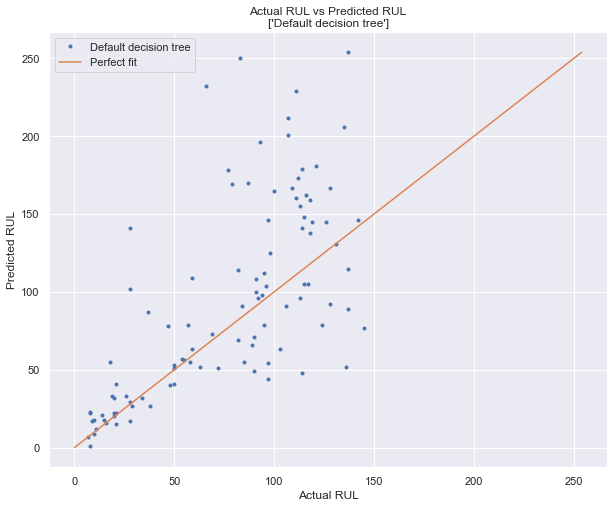

In [26]:
# create and fit decision tree regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dt_reg = DecisionTreeRegressor(random_state=0) # random state 0 so it's repeatable
dt_reg.fit(X_train, y_train)

print('Default decision tree regression model')
# predict and evaluate
y_hat_train = dt_reg.predict(X_train)
results_data = evaluate(y_train, y_hat_train,results_data,'DT default','train')

y_hat_test = dt_reg.predict(X_test)
results_data = evaluate(y_test, y_hat_test,results_data,'DT default')

model_test_results['Default decision tree'] = y_hat_test
PlotTestFit(['Default decision tree'],model_test_results)

In [27]:
print('Default decision tree generated with depth ', dt_reg.get_depth(), ' and ', dt_reg.get_n_leaves(), ' leaves')

Default decision tree generated with depth  40  and  19195  leaves


This decision tree is enormous!  Below is a visualisation of the top 2 depth levels:

In [28]:
import graphviz
from subprocess import call
from IPython.display import Image

def ExportDecisionTreeVisual(dt_reg, max_depth, file_name):
    dot_data = tree.export_graphviz(dt_reg, max_depth=max_depth,
                                    out_file=f'{file_name}.dot',
                                    feature_names=X_train.columns,
                                    filled=True, rounded=True,
                                    special_characters=True,
                                    rotate=True)  
    #graph = graphviz.Source(dot_data)  
    #graph
    call(['C:/users/stef_/anaconda3/pkgs/graphviz-2.50.0-hdb8b0d4_0/Library/bin/dot.exe', '-Tpng', 
          f'{file_name}.dot', '-o', f'{file_name}.png', f'-Gdpi=200'])

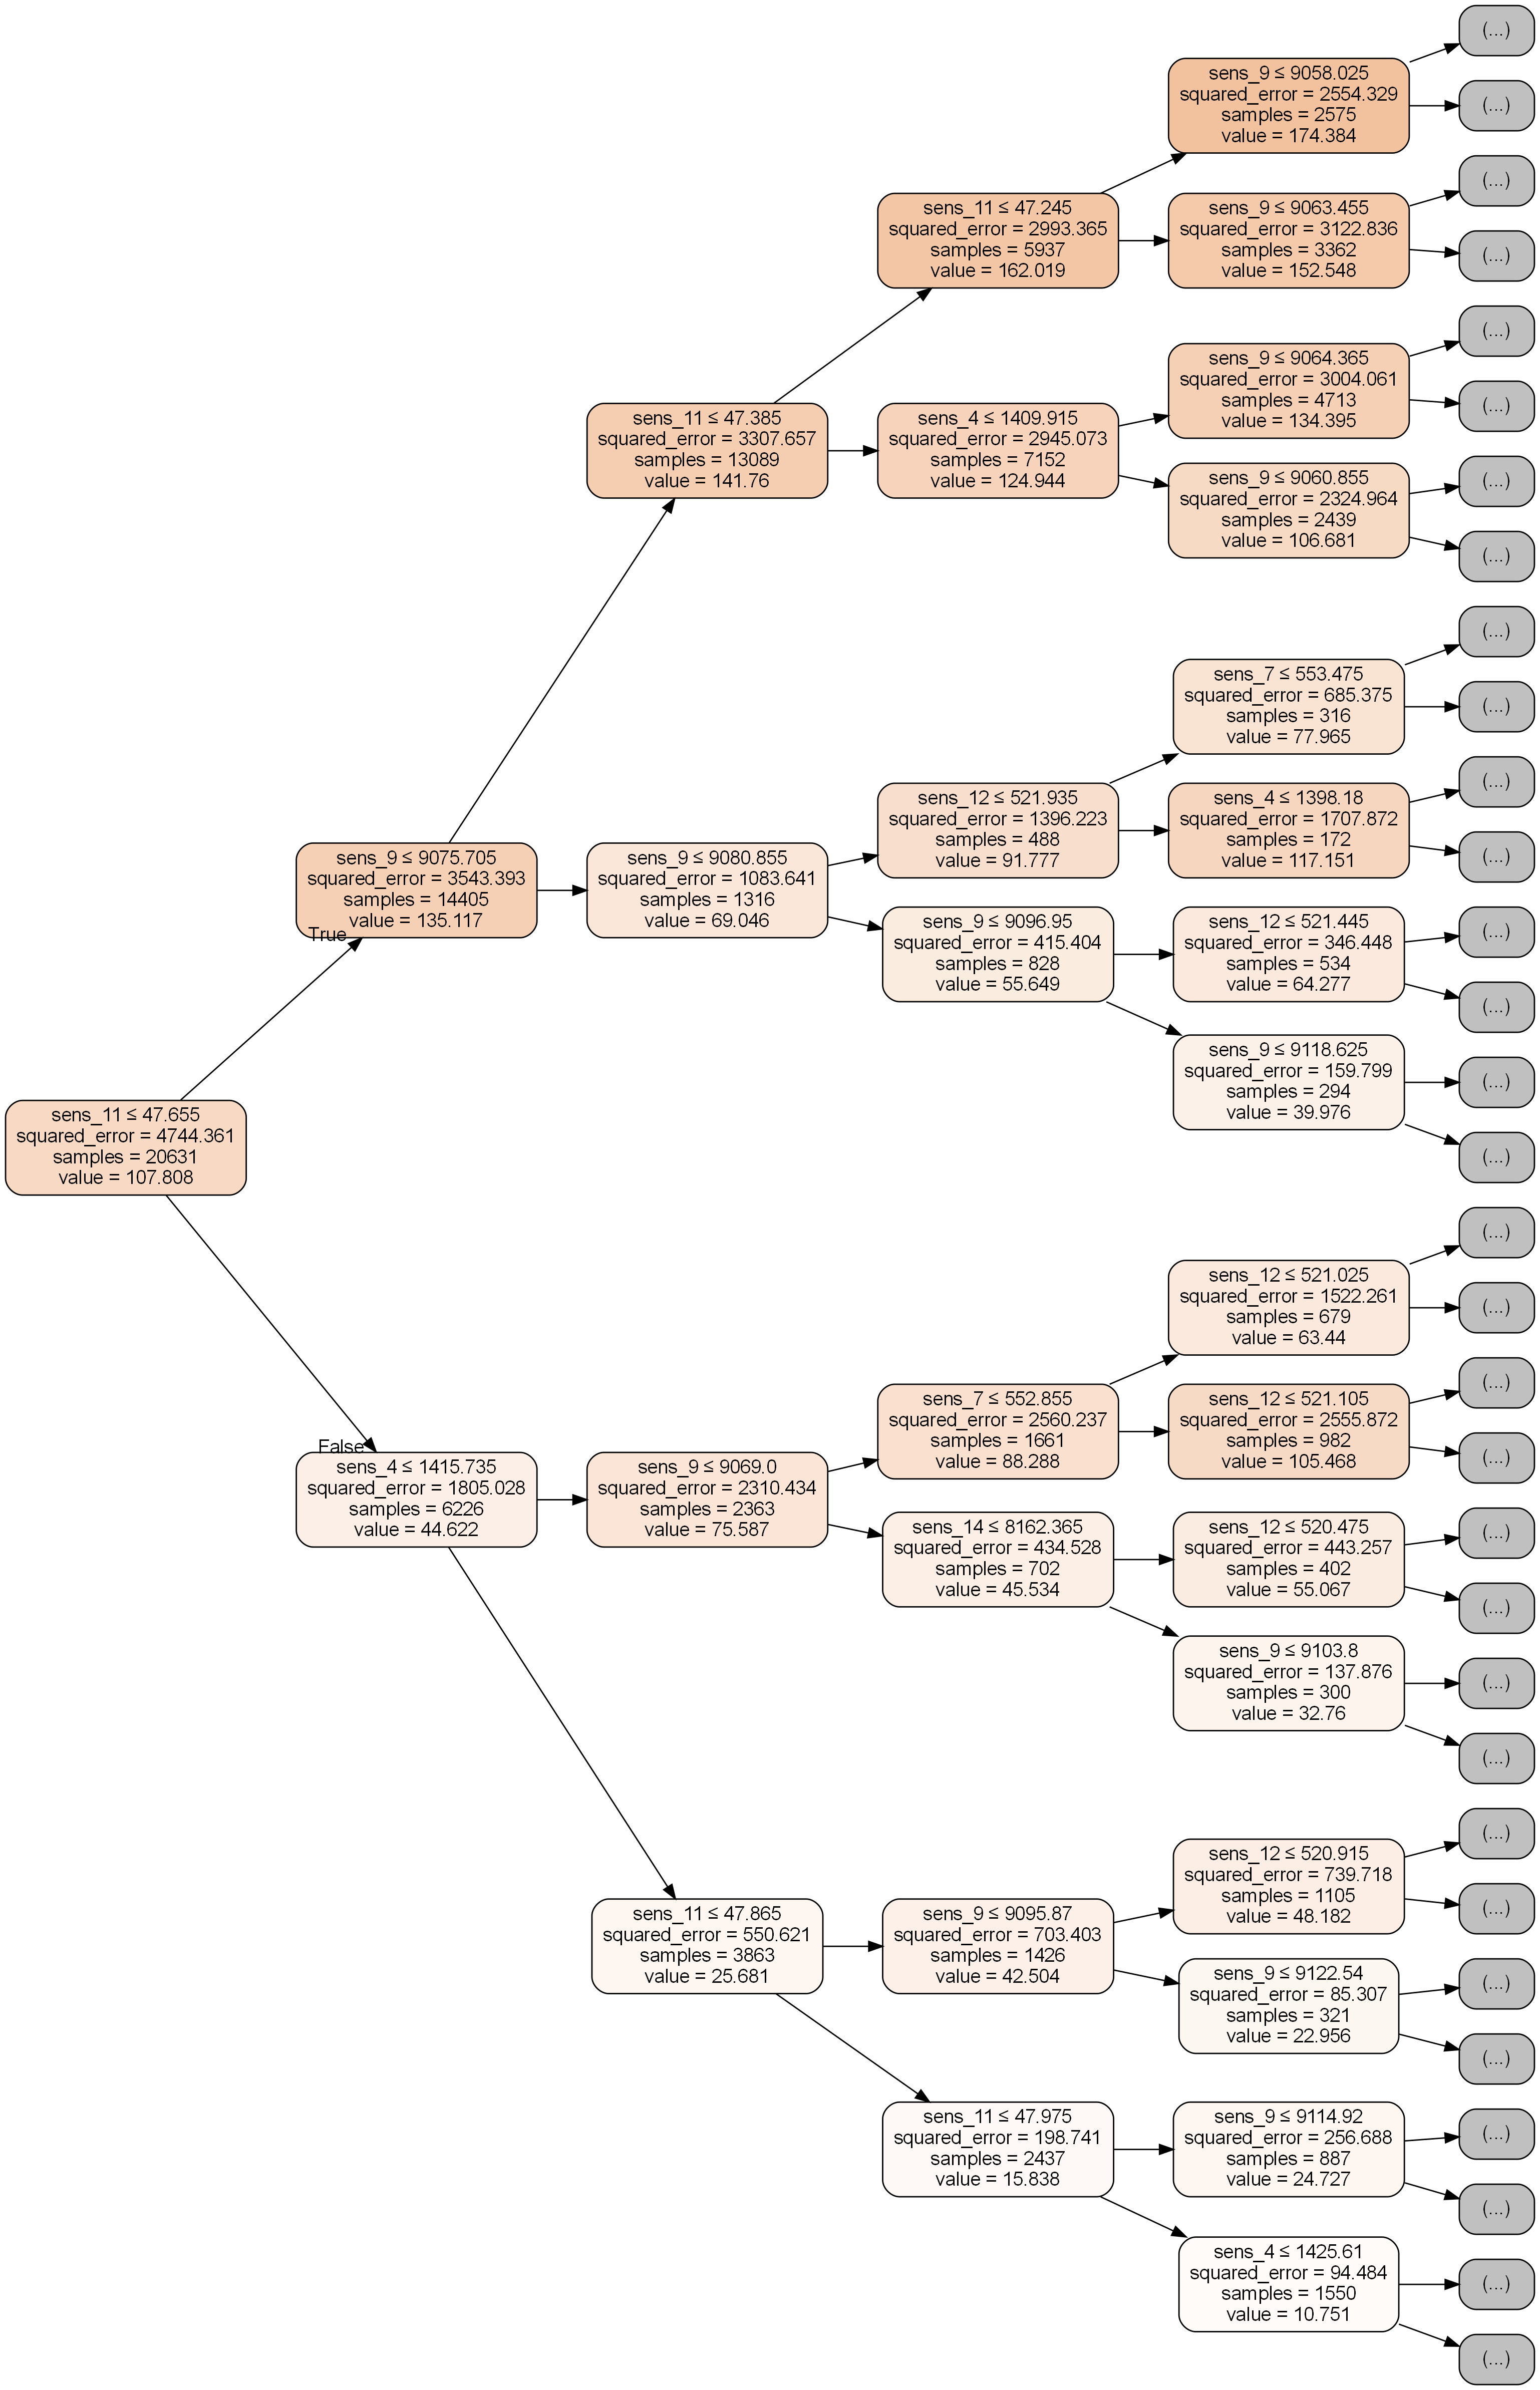

In [29]:
file_name = 'Images\default_decision_tree'
ExportDecisionTreeVisual(dt_reg, 4, file_name)
Image(filename = f'{file_name}.png')

### Tunable hyperparameters?

In [30]:
dt_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

## Optimising decision tree hyperparameters

### Hyperparameters

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

I will try to optimise the following hyperparameters:
-  max_depth
-  min_samples_leaf
-  min_impurity_decrease
-  ccp_alpha

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GroupKFold

In [32]:
max_depth = [None] + list(range(3, 40, 3))  # max depth of the default DT was 40
min_samples_leaf = list(range(1, 102, 10))  # default was set at 1
min_impurity_decrease = list(np.round(np.linspace(0, 10, 101), decimals=3))  # default was 0
ccp_alpha = list(np.round(np.linspace(0, 2, 81), decimals=3))  # default was 0

parameters = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_impurity_decrease': min_impurity_decrease,
    'ccp_alpha': ccp_alpha
}

print(parameters)

{'max_depth': [None, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39], 'min_samples_leaf': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101], 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0], 'ccp_alpha': [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 1.225, 1.25

In [33]:
tuning_options = len(max_depth) * len(min_samples_leaf) * len(min_impurity_decrease) * len(ccp_alpha)
print('Num tuning combinations', tuning_options)

Num tuning combinations 1259874


In [34]:
ITERATIONS = 300

dt = DecisionTreeRegressor(max_features="sqrt", random_state=0)
gkf = GroupKFold(n_splits=3)


regressor = RandomizedSearchCV(dt, 
                               parameters, 
                               cv = gkf.split(train, groups=train['unit_num']),
                               verbose=2, 
                               error_score='raise',
                               n_iter=ITERATIONS, 
                               n_jobs=-2,
                               # scoring https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                               scoring= 'neg_root_mean_squared_error')  
regressor.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002AE02FE5E40>,
                   error_score='raise',
                   estimator=DecisionTreeRegressor(max_features='sqrt',
                                                   random_state=0),
                   n_iter=300, n_jobs=-2,
                   param_distributions={'ccp_alpha': [0.0, 0.025, 0.05, 0.075,
                                                      0.1, 0.125, 0.15, 0.175,
                                                      0.2, 0.225, 0.25, 0.275,
                                                      0.3, 0.325, 0.35, 0.375,
                                                      0.4, 0.425, 0.45, 0.475,
                                                      0.5, 0.525, 0.55, 0.575,
                                                      0.6, 0.625, 0.65, 0.675,
                                                      0.7, 0.725, ...],
                                        'max_depth': [None, 3, 6, 9, 12,

In [35]:
results = pd.DataFrame(regressor.cv_results_)
columns = ['param_min_samples_leaf', 'param_min_impurity_decrease', 'param_max_depth', 'param_ccp_alpha', 
           'mean_test_score', 'std_test_score', 'rank_test_score']
results[columns].sort_values('mean_test_score', ascending=False)

param_min_samples_leaf param_min_impurity_decrease param_max_depth  \
157                     21                         0.5              15   
186                     11                         0.1               6   
258                     51                         0.2              24   
78                      51                         0.5            None   
146                     31                         0.6               9   
..                     ...                         ...             ...   
174                     41                         6.6               3   
254                     71                         3.3               3   
20                       1                         0.5            None   
147                      1                         0.1              15   
108                      1                         0.0              39   

    param_ccp_alpha  mean_test_score  std_test_score  rank_test_score  
157            1.05       -45.458340        2.331942                1  
186             0.3       -45.535359        2.096510                2  
258           0.175       -45.611931        2.727848                3  
78            0.175       -45.615197        2.424295                4  
146           0.725       -45.619715        2.698476                5  
..              ...              ...             ...              ...  
174            0.45       -48.472273        1.594944              276  
254            1.15       -48.472273        1.594944              276  
20              0.9       -50.861618        2.136247              298  
147             0.1       -54.385847        2.211443              299  
108            0.45       -54.602642        2.198513              300  

[300 rows x 7 columns]

In [36]:
print(regressor.best_params_)
print(regressor.best_score_)

{'min_samples_leaf': 21, 'min_impurity_decrease': 0.5, 'max_depth': 15, 'ccp_alpha': 1.05}
-45.45834045577461


## Optimised decision tree

Optimised decision tree regression model
train set RMSE: 41.825555373331255, R2:0.6312723370918567
Test set RMSE: 34.44546541146288, R2:0.3129243300059913


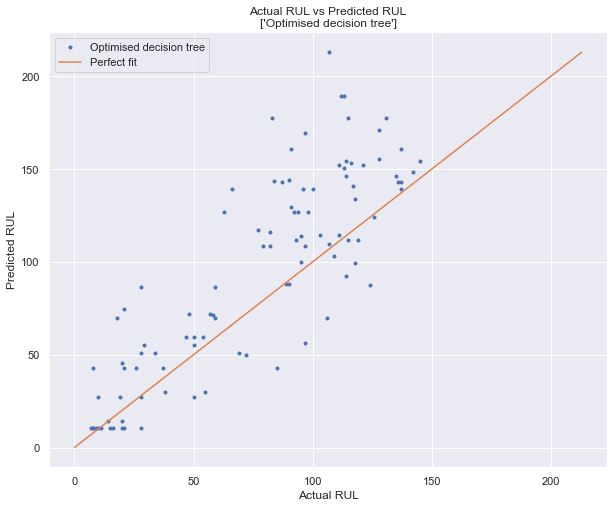

In [37]:
dt_opt = DecisionTreeRegressor(max_features="sqrt",
                               random_state=0,
                               max_depth= regressor.best_params_['max_depth'],
                               min_samples_leaf= regressor.best_params_['min_samples_leaf'],
                               min_impurity_decrease= regressor.best_params_['min_impurity_decrease'],
                               ccp_alpha= regressor.best_params_['ccp_alpha'])
dt_opt.fit(X_train, y_train)

print('Optimised decision tree regression model')
# predict and evaluate
y_hat_train = dt_opt.predict(X_train)
results_data = evaluate(y_train, y_hat_train,results_data,'DT opt','train')

y_hat_test = dt_opt.predict(X_test)
results_data = evaluate(y_test, y_hat_test,results_data,'DT opt')

model_test_results['Optimised decision tree'] = y_hat_test
PlotTestFit(['Optimised decision tree'],model_test_results)

## Default random forest regression

Default random forest regression model
train set RMSE: 15.509133890430894, R2:0.9493012352030331
Test set RMSE: 32.55249551109715, R2:0.3863665420944348


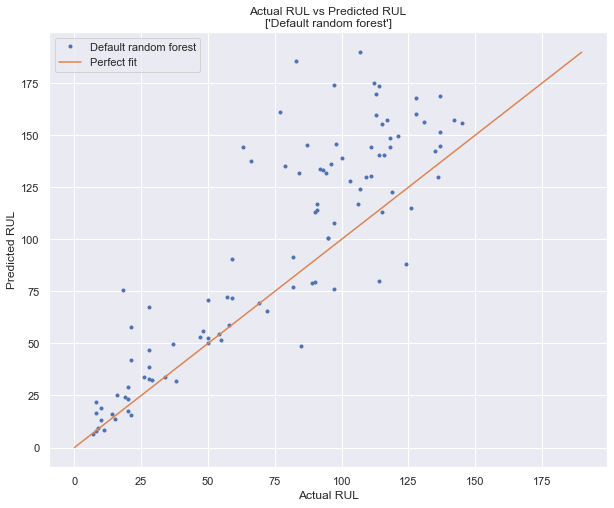

In [38]:
# create and fit decision tree regression model
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=0) # random state 0 so it's repeatable
rf_reg.fit(X_train, y_train)

print('Default random forest regression model')
# predict and evaluate
y_hat_train = rf_reg.predict(X_train)
results_data = evaluate(y_train, y_hat_train,results_data,'RF default','train')

y_hat_test = rf_reg.predict(X_test)
results_data = evaluate(y_test, y_hat_test,results_data,'RF default')

model_test_results['Default random forest'] = y_hat_test
PlotTestFit(['Default random forest'],model_test_results)

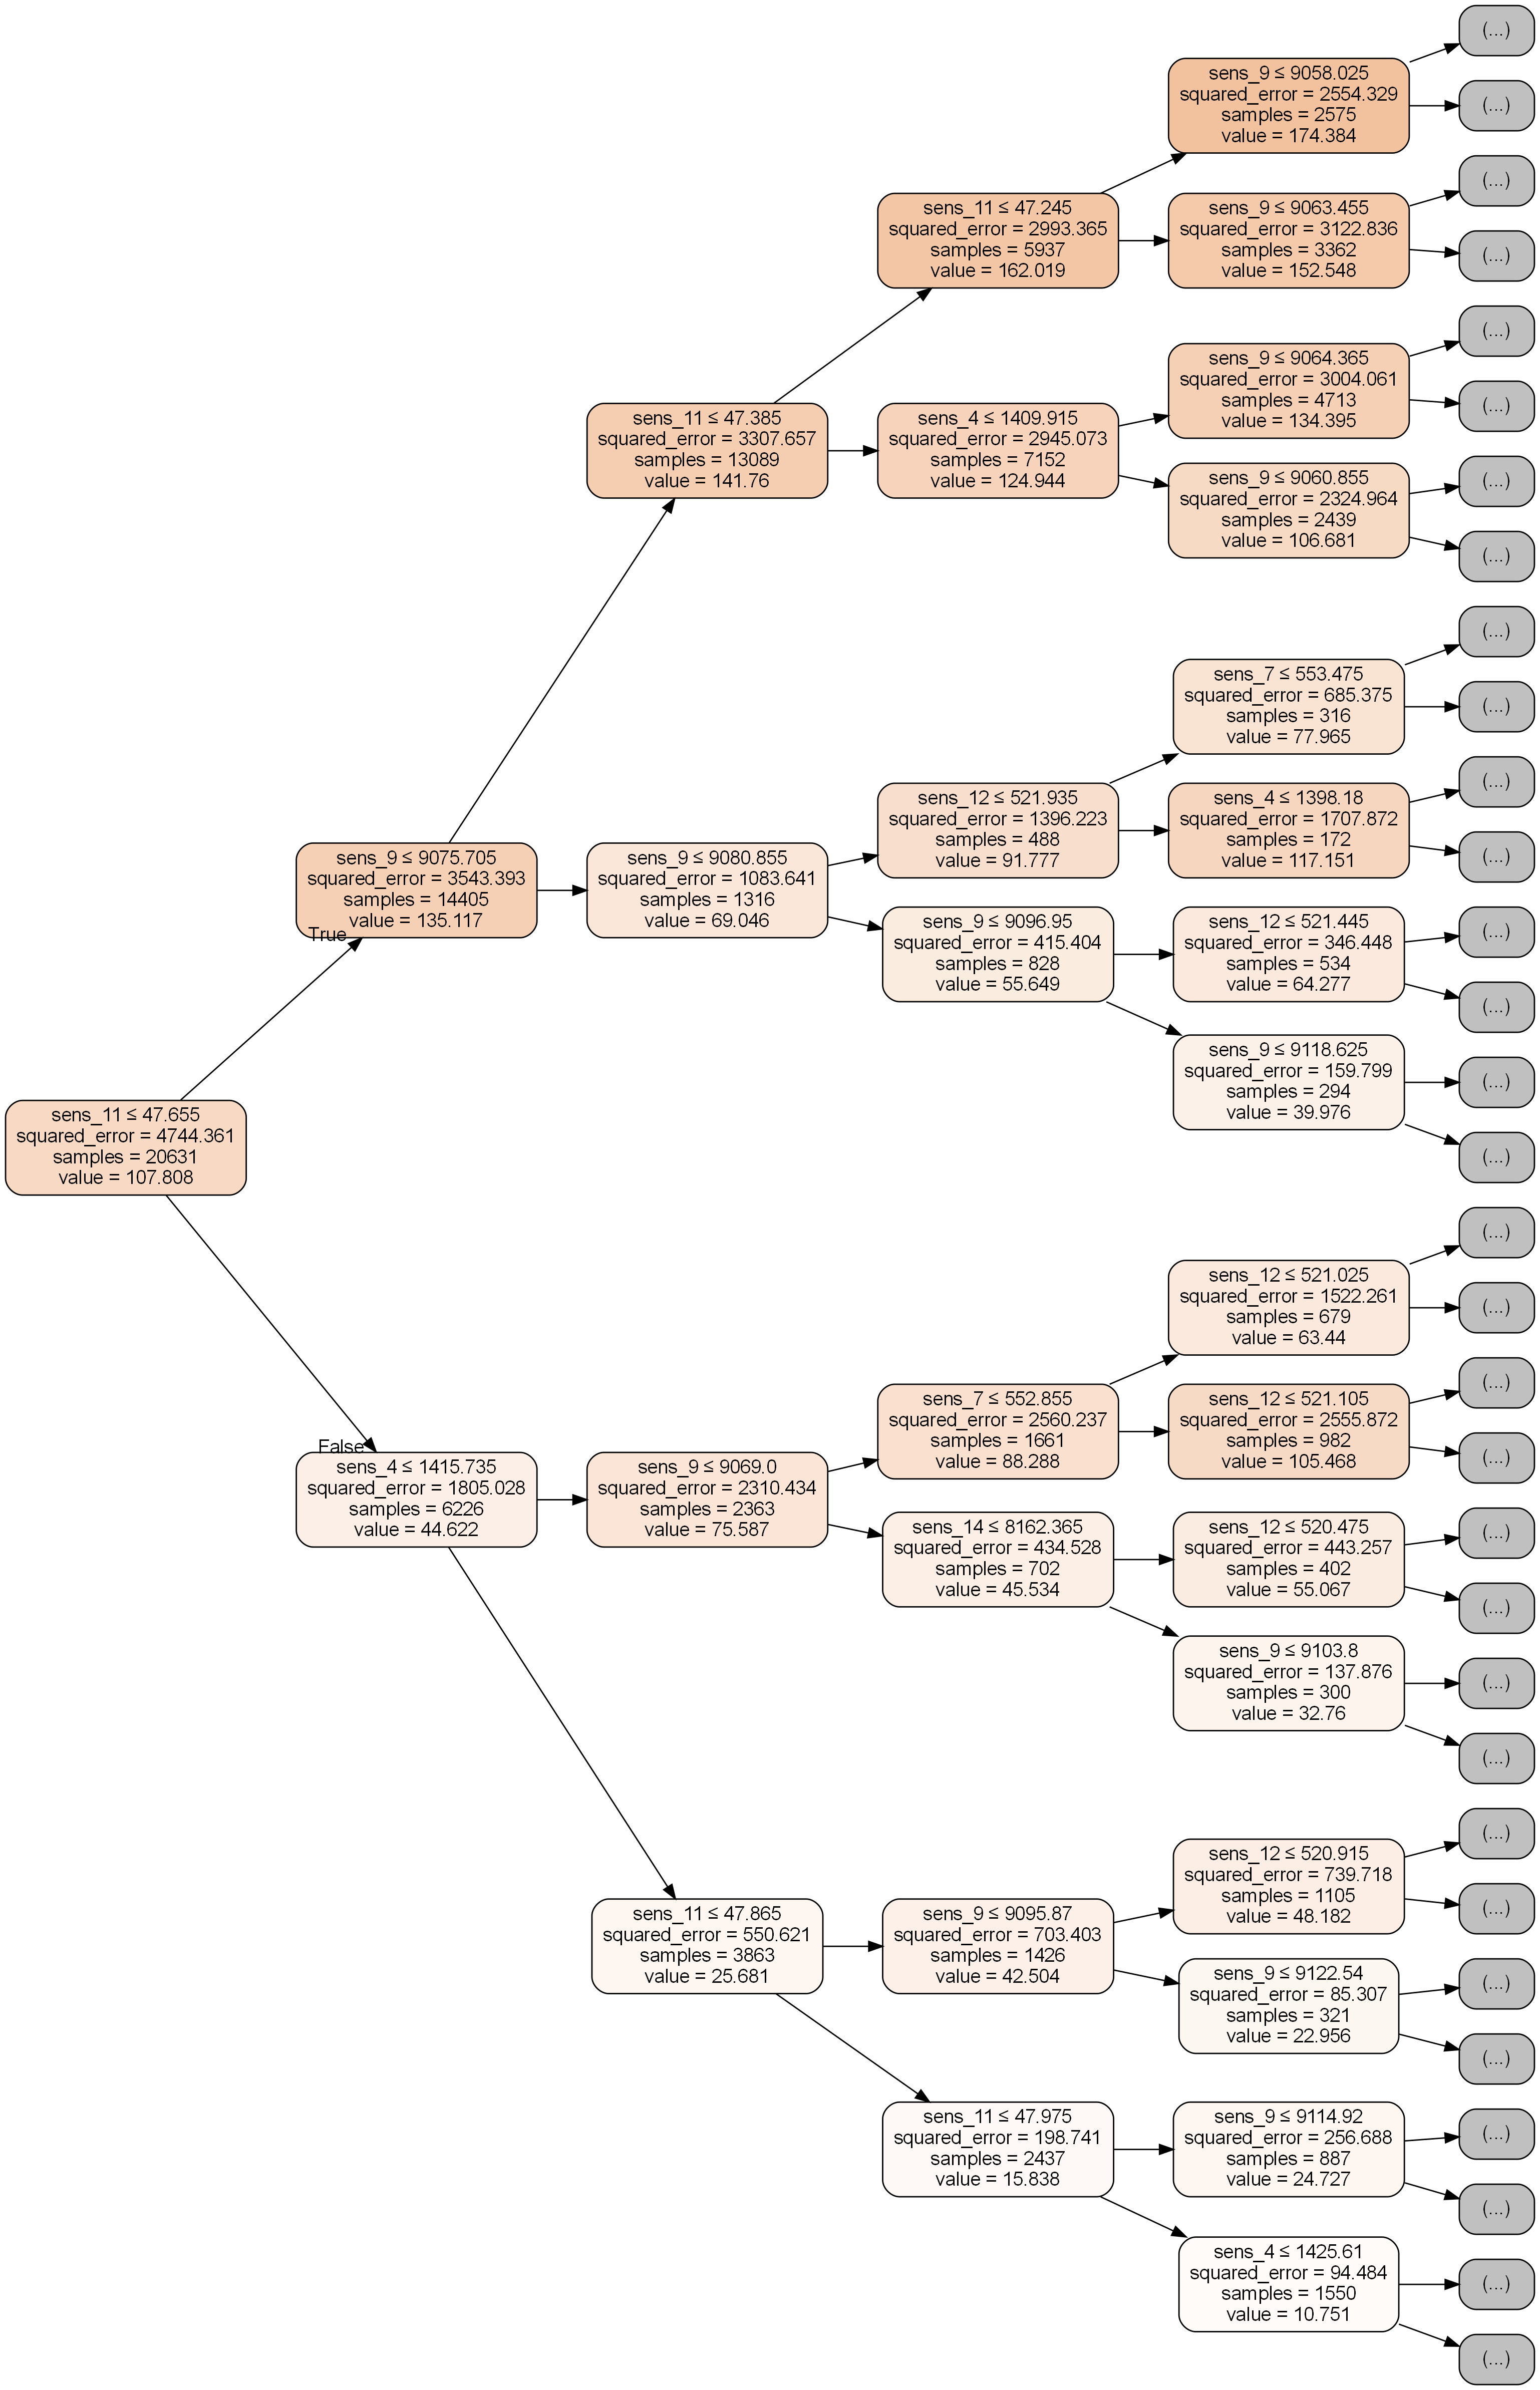

In [39]:
file_name = 'Images/default_random_forest'
ExportDecisionTreeVisual(dt_reg, 4, file_name)
Image(filename = f'{file_name}.png')

### Tunable hyperparameters?

In [40]:
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

## Optimising random forest hyperparameters

### Hyperparameters - optimise the same ones as with decision tree

I will try to optimise the following hyperparameters:
-  max_depth
-  min_samples_leaf
-  min_impurity_decrease
-  ccp_alpha

In [41]:
max_depth = [None] + list(range(3, 40, 3))  # max depth of the default DT was 40
min_samples_leaf = list(range(1, 102, 10))  # default was set at 1
min_impurity_decrease = list(np.round(np.linspace(0, 10, 101), decimals=3))  # default was 0
ccp_alpha = list(np.round(np.linspace(0, 2, 81), decimals=3))  # default was 0

parameters = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_impurity_decrease': min_impurity_decrease,
    'ccp_alpha': ccp_alpha
}

print(parameters)

{'max_depth': [None, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39], 'min_samples_leaf': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101], 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0], 'ccp_alpha': [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 1.225, 1.25

In [42]:
tuning_options = len(max_depth) * len(min_samples_leaf) * len(min_impurity_decrease) * len(ccp_alpha)
print('Num tuning combinations', tuning_options)

Num tuning combinations 1259874


In [43]:
ITERATIONS = 300

rf = RandomForestRegressor(max_features="sqrt", random_state=0)
gkf = GroupKFold(n_splits=3)


regressor = RandomizedSearchCV(rf, 
                               parameters, 
                               cv = gkf.split(train, groups=train['unit_num']),
                               verbose=2, 
                               error_score='raise',
                               n_iter=ITERATIONS, 
                               n_jobs=-2,
                               # scoring https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                               scoring= 'neg_root_mean_squared_error')  
regressor.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002AE047FDBA0>,
                   error_score='raise',
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   random_state=0),
                   n_iter=300, n_jobs=-2,
                   param_distributions={'ccp_alpha': [0.0, 0.025, 0.05, 0.075,
                                                      0.1, 0.125, 0.15, 0.175,
                                                      0.2, 0.225, 0.25, 0.275,
                                                      0.3, 0.325, 0.35, 0.375,
                                                      0.4, 0.425, 0.45, 0.475,
                                                      0.5, 0.525, 0.55, 0.575,
                                                      0.6, 0.625, 0.65, 0.675,
                                                      0.7, 0.725, ...],
                                        'max_depth': [None, 3, 6, 9, 12,

In [44]:
results = pd.DataFrame(regressor.cv_results_)
columns = ['param_min_samples_leaf', 'param_min_impurity_decrease', 'param_max_depth', 'param_ccp_alpha', 
           'mean_test_score', 'std_test_score', 'rank_test_score']
results[columns].sort_values('mean_test_score', ascending=False)

param_min_samples_leaf param_min_impurity_decrease param_max_depth  \
277                     21                         0.9               9   
251                     21                         0.9              30   
76                       1                         0.3               9   
105                     11                         0.1              18   
113                     11                         1.2              18   
..                     ...                         ...             ...   
66                      61                         1.7               3   
176                     51                         9.3               3   
64                      41                         7.3               3   
59                      41                         4.6               3   
0                       61                         8.6               3   

    param_ccp_alpha  mean_test_score  std_test_score  rank_test_score  
277            0.95       -42.573267        2.642523                1  
251           0.325       -42.573296        2.678991                2  
76            1.425       -42.576920        2.597241                3  
105           1.375       -42.583965        2.606779                4  
113            0.45       -42.588729        2.632680                5  
..              ...              ...             ...              ...  
66            1.875       -45.317794        1.924136              281  
176           1.325       -45.317794        1.924136              281  
64             1.05       -45.317794        1.924136              281  
59              1.6       -45.317794        1.924136              281  
0               0.5       -45.317794        1.924136              281  

[300 rows x 7 columns]

In [45]:
print(regressor.best_params_)
print(regressor.best_score_)

{'min_samples_leaf': 21, 'min_impurity_decrease': 0.9, 'max_depth': 9, 'ccp_alpha': 0.95}
-42.57326673475811


## Optimised random forest

Optimised random forest regression model
train set RMSE: 39.84618135137375, R2:0.6653462449710672
Test set RMSE: 30.4172696702546, R2:0.46422689113700843


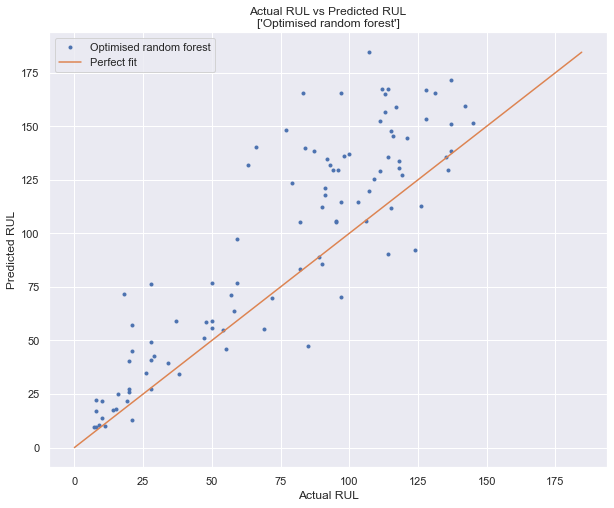

In [46]:
rf_opt = RandomForestRegressor(n_estimators=100,
                               max_features="sqrt",
                               random_state=0,
                               max_depth= regressor.best_params_['max_depth'],
                               min_samples_leaf= regressor.best_params_['min_samples_leaf'],
                               min_impurity_decrease= regressor.best_params_['min_impurity_decrease'],
                               ccp_alpha= regressor.best_params_['ccp_alpha'])
rf_opt.fit(X_train, y_train)

print('Optimised random forest regression model')
# predict and evaluate
y_hat_train = rf_opt.predict(X_train)
results_data = evaluate(y_train, y_hat_train,results_data,'RF opt','train')

y_hat_test = rf_opt.predict(X_test)
results_data = evaluate(y_test, y_hat_test,results_data,'RF opt')

model_test_results['Optimised random forest'] = y_hat_test
PlotTestFit(['Optimised random forest'],model_test_results)

## Compare models

In [47]:
results_df = pd.DataFrame(data=results_data,columns=['model','dataset','RMSE','R2'])

results_df.head(20)

model dataset       RMSE        R2
0   Linear baseline   train  44.668192  0.579449
1   Linear baseline    Test  31.952633  0.408774
2       KNN default   train  38.989948  0.679574
3       KNN default    Test  36.307558  0.236631
4           KNN opt   train  38.989948  0.679574
5           KNN opt    Test  36.307558  0.236631
6        DT default   train   0.000000  1.000000
7        DT default    Test  49.216765 -0.402706
8            DT opt   train  41.825555  0.631272
9            DT opt    Test  34.445465  0.312924
10       RF default   train  15.509134  0.949301
11       RF default    Test  32.552496  0.386367
12           RF opt   train  39.846181  0.665346
13           RF opt    Test  30.417270  0.464227

<AxesSubplot:xlabel='model', ylabel='RMSE'>

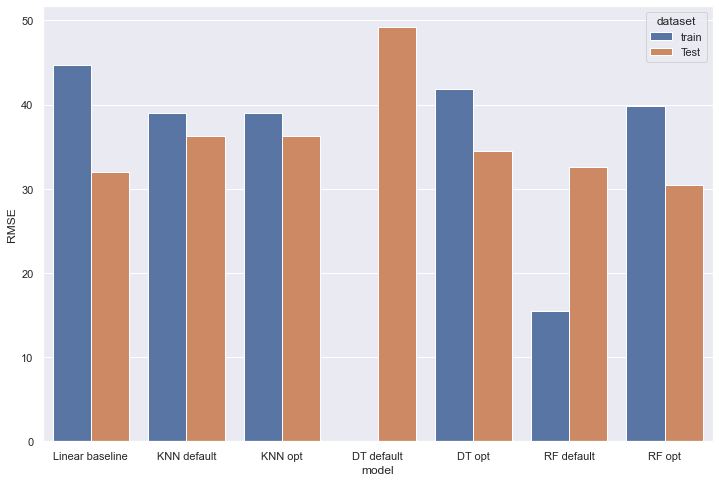

In [48]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=results_df, x="model", y="RMSE", hue="dataset")

In [49]:
test_metrics_df = results_df
test_metrics_df = test_metrics_df.drop(test_metrics_df.loc[test_metrics_df['dataset'] =='train'].index)

test_metrics_df = test_metrics_df.drop(['dataset','R2'],axis=1)

baseline_rmse = test_metrics_df[test_metrics_df['model'] =='Linear baseline']['RMSE'].max()
test_metrics_df['Rel_RMSE'] = test_metrics_df['RMSE'] / baseline_rmse

print(test_metrics_df)

              model       RMSE  Rel_RMSE
1   Linear baseline  31.952633  1.000000
3       KNN default  36.307558  1.136293
5           KNN opt  36.307558  1.136293
7        DT default  49.216765  1.540304
9            DT opt  34.445465  1.078016
11       RF default  32.552496  1.018773
13           RF opt  30.417270  0.951949


<AxesSubplot:xlabel='model', ylabel='Rel_RMSE'>

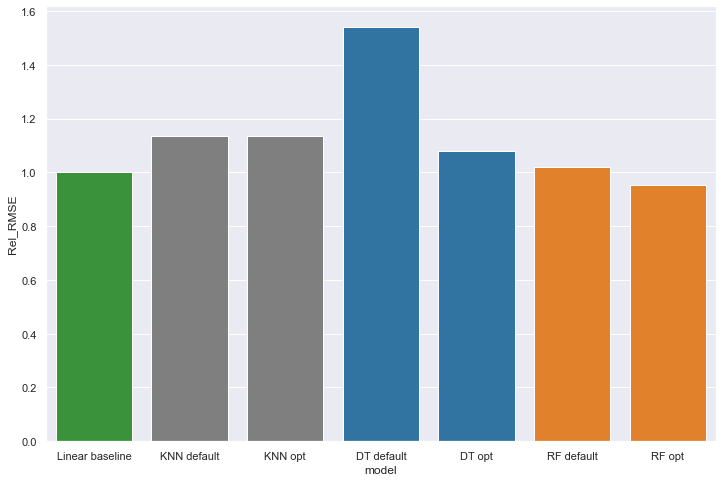

In [50]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=test_metrics_df, x="model", y="Rel_RMSE", 
            palette=['tab:green','tab:grey','tab:grey','tab:blue','tab:blue','tab:orange','tab:orange'])

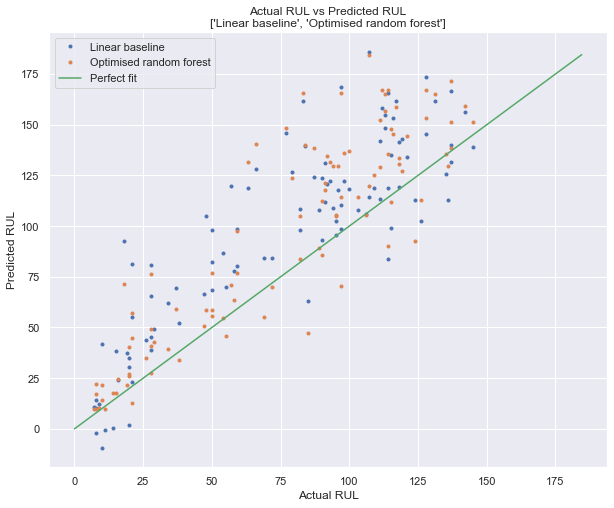

In [51]:
PlotTestFit(['Linear baseline','Optimised random forest'],model_test_results)

## Discussion

In this notebook investigation three machine learning models have been optimised and compared against a baseline linear regression.  The only model to improve upon the baseline was the optimised random forest model.

It is apparent that the sensors output a constant value (albeit with noise) until such time as the engine enters a period of degredation before failure, where RUL is zero.  There is potential to improve upon the models by limiting the training data to contain data within the degredation period before failure.  It would also be useful to be able to place a confidence level on the predicted RUL.  I would also like to have applied a fully connected neural network to this data and optimised this to investigate a CNNs ability to model this data.